In [3]:
import zipfile
import shutil
import numpy as np
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_path = '_static/playback-thumbnail.png'

import librosa
import librosa.display

# We'll need IPython.display's Audio widget
from IPython.display import Audio

# We'll also use `mir_eval` to synthesize a signal for us
import mir_eval.sonify

import pandas as pd
import csv
import os
import json
import scipy



Selecionando as imagens com os 10 acordes mais frequentes na base de dados:

In [4]:
most_freq = np.array(['F:maj', 'G:maj', 'G#:maj', 'C#:maj', 'C:maj', 'E:maj', 'D#:maj',
       'D:maj', 'A#:maj', 'F#:maj'])

df = pd.read_csv('metadata_final.csv', sep = ',')
df_chords = df[df['most_freq'] == 1]


In [5]:
## paths

audio_fpath = 'processed_audio/'
audio_clips = df_chords['Filename']


In [4]:
df_chords['Acorde'].unique()

array(['G#:maj', 'C#:maj', 'D:maj', 'G:maj', 'E:maj', 'F#:maj', 'D#:maj',
       'A#:maj', 'F:maj', 'C:maj'], dtype=object)

In [4]:
show_filenames = []
# Recuperando um caso de cada acorde, para comparar os espectogramas
for i in most_freq:
    filename = df_chords.loc[df_chords['Acorde'] == i]['Filename'].iloc[0,]
    show_filenames.append(filename)

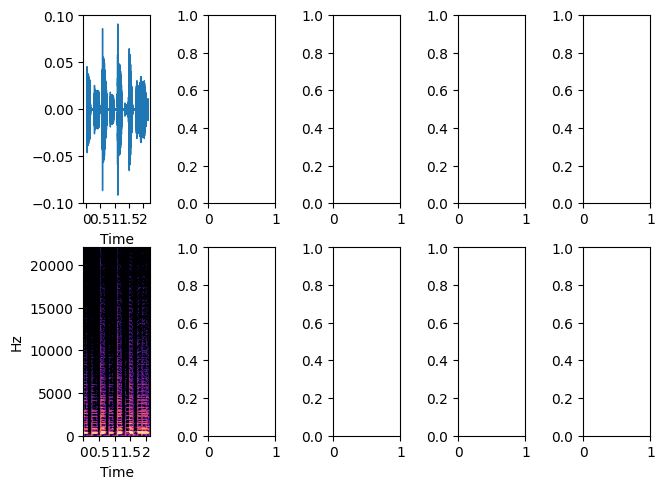

<Figure size 1400x700 with 0 Axes>

In [12]:
fig, ax = plt.subplots(2,5)
plt.figure(figsize=(14, 7))
fig.tight_layout()


x, sr = librosa.load(audio_fpath+j, sr=44100)
librosa.display.waveshow(x, sr=sr, ax = ax[0,0])
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax = ax[1,0])
# plt.colorbar()
# plt.show()

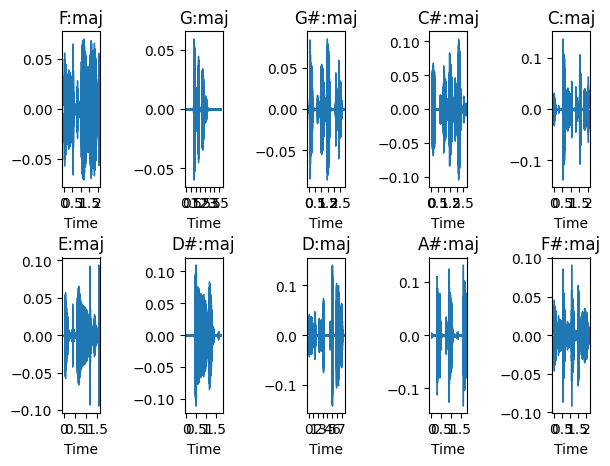

<Figure size 2000x1200 with 0 Axes>

In [39]:
fig, axes = plt.subplots(2,5)
plt.figure(figsize=(20, 12))
fig.tight_layout(pad = 2.5, h_pad = 3, w_pad= 3)

for j in range(len(show_filenames)):
        
    x, sr = librosa.load(audio_fpath+show_filenames[j], sr=44100)

    if j <= 4:
        librosa.display.waveshow(x, sr=sr, ax =  axes[0,j])
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        axes[0,j].set(title= most_freq[j])
    
    else:
        librosa.display.waveshow(x, sr=sr, ax = axes[1,j-5])
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        axes[1,j-5].set(title= most_freq[j])


    # X = librosa.stft(x)
    # Xdb = librosa.amplitude_to_db(abs(X))
    # plt.figure(figsize=(2, 2))
    # ax = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    # plt.colorbar()
    # plt.show()

    # print(type(x), type(sr))
    # print(x.shape, sr)

#plt.show()

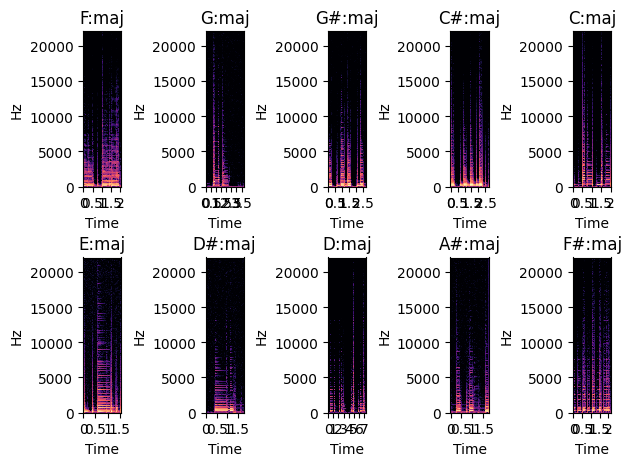

<Figure size 1400x700 with 0 Axes>

In [45]:
fig, axes = plt.subplots(2,5)
plt.figure(figsize=(14, 7))
fig.tight_layout(pad = 2.5, h_pad = 3, w_pad= 3)
images = []
for j in range(len(show_filenames)):
        
    x, sr = librosa.load(audio_fpath+show_filenames[j], sr=44100)

    if j <= 4:
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        img = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax =  axes[0,j])
        #plt.colorbar()
        axes[0,j].set(title= most_freq[j])
    
    else:
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        img = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax =  axes[1,j-5])
        #plt.colorbar()
        axes[1,j-5].set(title= most_freq[j])

    images.append(img)
    
    # plt.show()

    # print(type(x), type(sr))
    # print(x.shape, sr)


F:maj


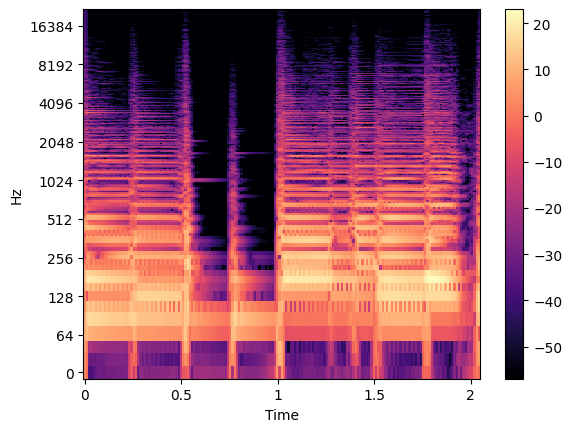

G:maj


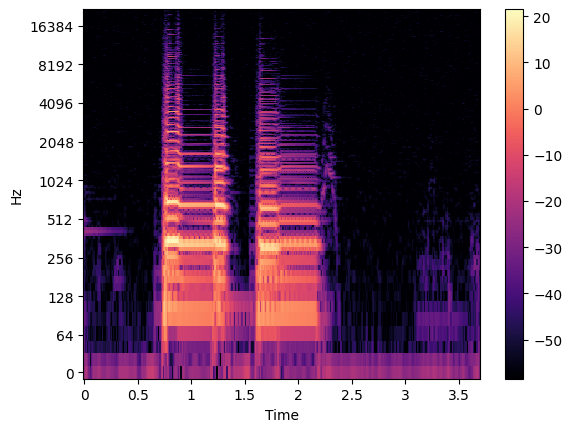

G#:maj


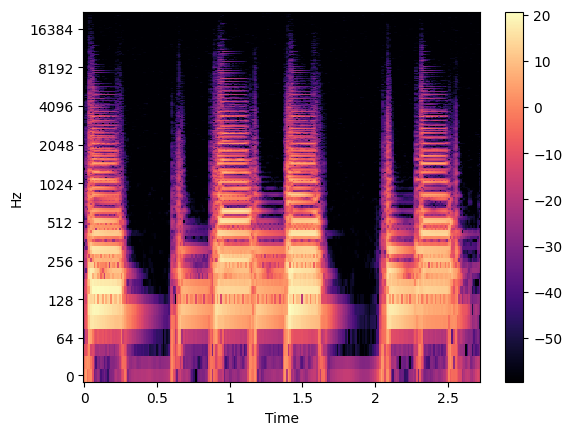

C#:maj


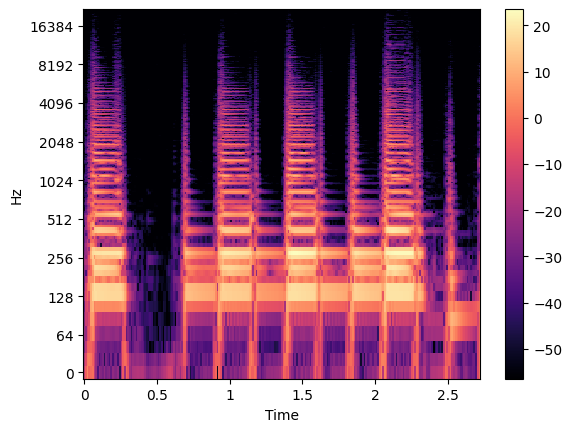

C:maj


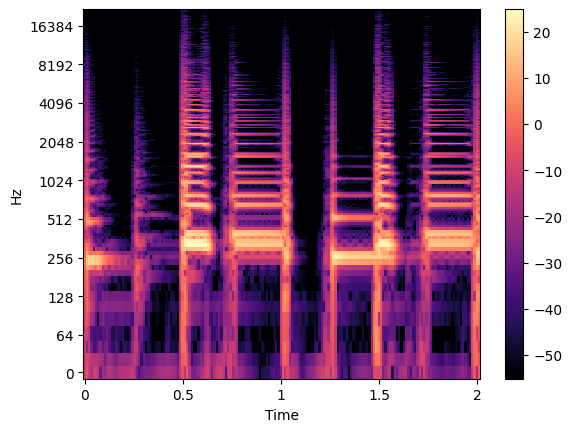

E:maj


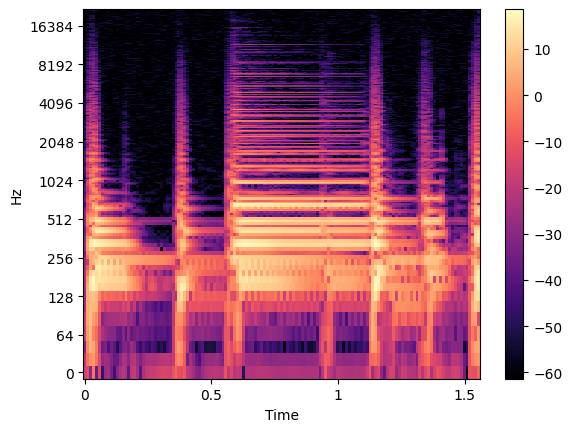

D#:maj


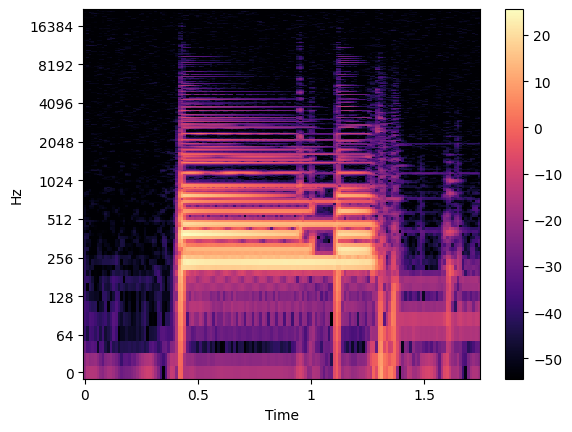

D:maj


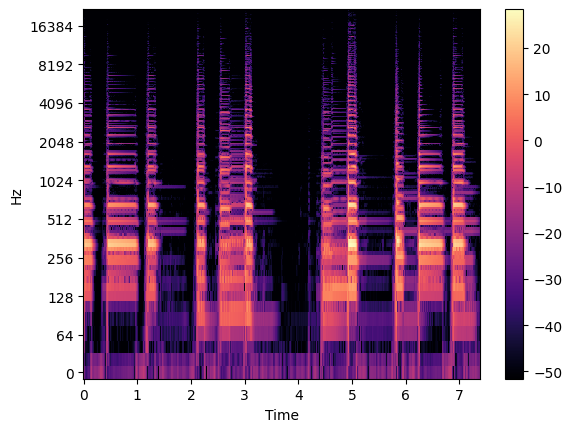

A#:maj


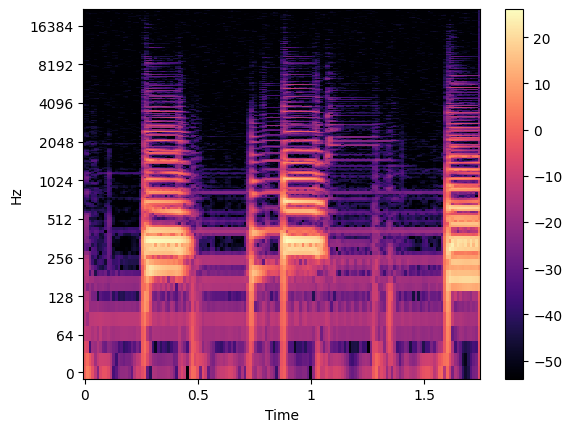

F#:maj


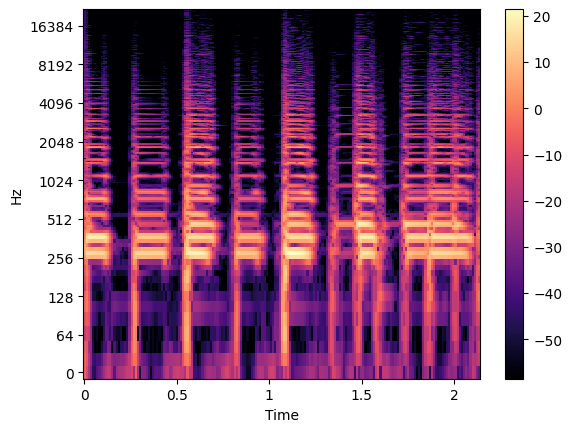

In [55]:
for j in range(len(show_filenames)):
    

    x, sr = librosa.load(audio_fpath+show_filenames[j], sr=44100)

    print(most_freq[j])
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()
    

F:maj


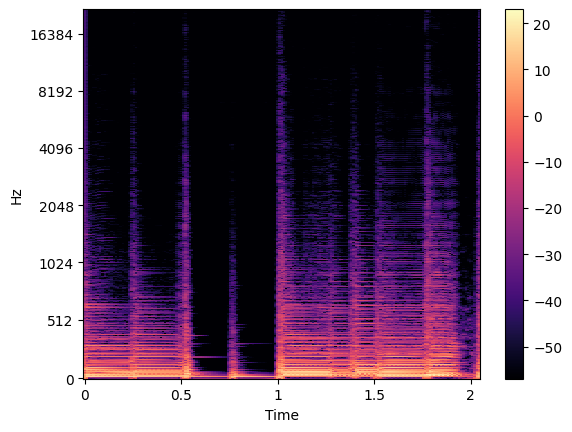

G:maj


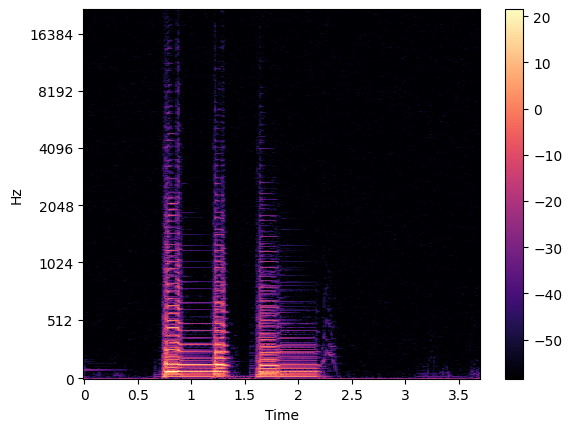

G#:maj


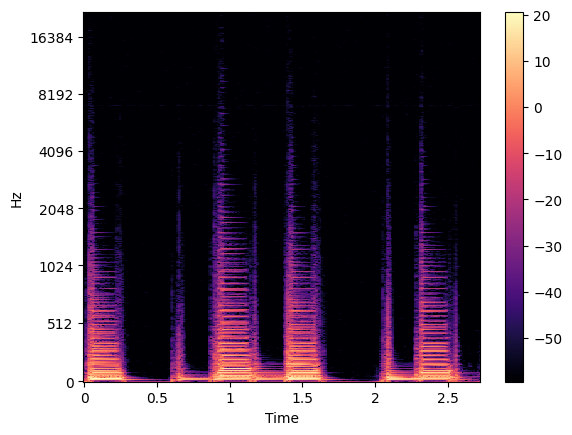

C#:maj


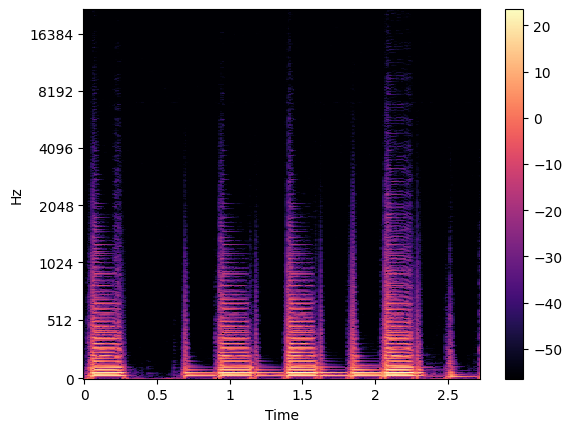

C:maj


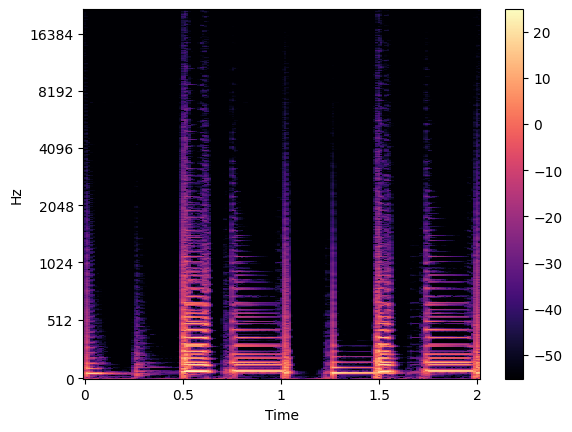

E:maj


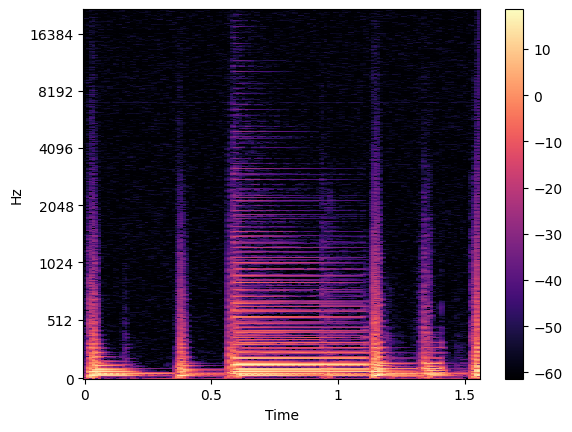

D#:maj


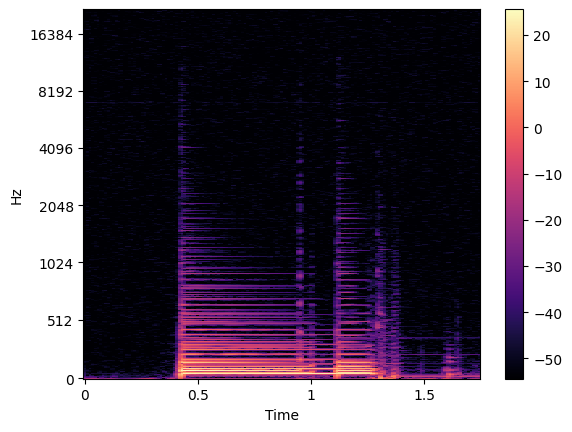

D:maj


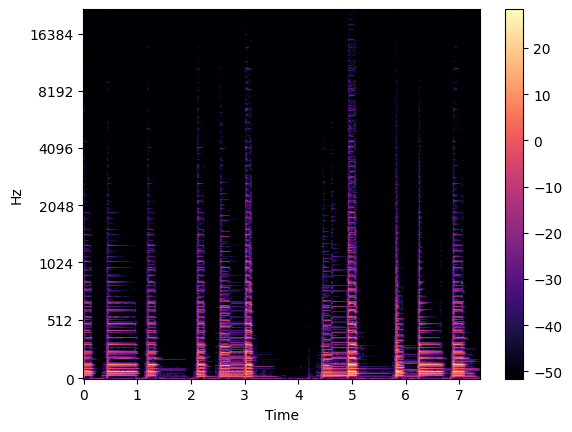

A#:maj


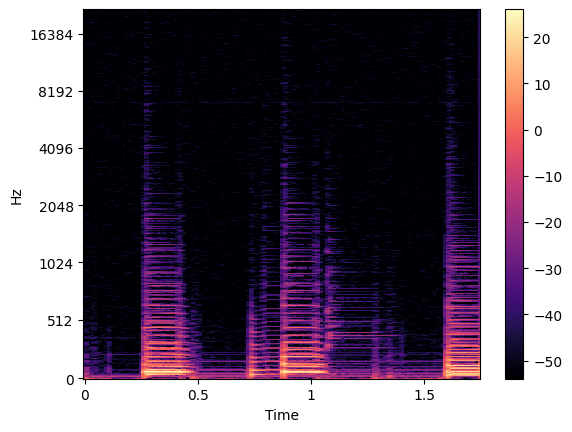

F#:maj


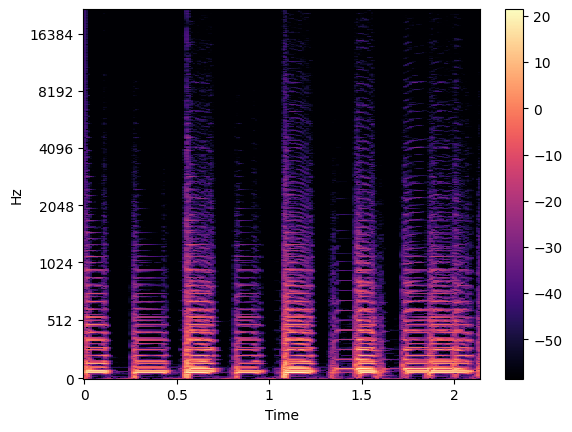

In [54]:
for j in range(len(show_filenames)):
    

    x, sr = librosa.load(audio_fpath+show_filenames[j], sr=44100)

    print(most_freq[j])
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.show()

In [53]:
# plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
# plt.savefig('teste.png')

# plt.colorbar()


In [31]:
spec = np.abs(librosa.stft(X, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)


mel_spect = librosa.feature.melspectrogram(y=X, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(spec, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

ParameterError: Audio data must be floating-point

In [61]:
df_chords

,Filename,Loc,Acorde,Arquivo Original,most_freq
2,file_1395.wav,processed_audio/,G#:maj,01_SS2-88-F_comp_hex.wav,1
3,file_1396.wav,processed_audio/,C#:maj,01_SS2-88-F_comp_hex.wav,1
9,file_1402.wav,processed_audio/,G#:maj,01_SS2-88-F_comp_hex.wav,1
10,file_1403.wav,processed_audio/,C#:maj,01_SS2-88-F_comp_hex.wav,1
14,file_2487.wav,processed_audio/,D:maj,05_Jazz1-130-D_comp_hex.wav,1
...,...,...,...,...,...
2153,file_180804.wav,processed_audio/,G#:maj,00_Funk3-112-C#_comp_hex.wav,1
2156,file_180807.wav,processed_audio/,F#:maj,00_Funk3-112-C#_comp_hex.wav,1
2157,file_180808.wav,processed_audio/,C#:maj,00_Funk3-112-C#_comp_hex.wav,1
2158,file_180809.wav,processed_audio/,F#:maj,00_Funk3-112-C#_comp_hex.wav,1


In [5]:
from tqdm import tqdm

def save_spectogram(files, audio_fpath, output, count = 500):
    #audio_clips = os.listdir(audio_fpath)

    available = os.listdir('spectogram/')
    available  = [i.replace('.png', '.wav') for i in available]

    not_processed = [i for i in files if i not in available]

    iter = 0
    for i in tqdm(not_processed):
        if iter == count:
            break

        x, sr = librosa.load(audio_fpath + i, sr=44100)
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
        plt.savefig( output +  i[:-3] + 'png', dpi = 96)
        iter +=1

        if iter%50 ==0:
            text = f'Total de:{ str(iter)}/{len(not_processed)} espectogramas gerados'
            print(text)
        

  0%|          | 0/138 [00:00<?, ?it/s]

 36%|███▌      | 50/138 [04:16<14:45, 10.06s/it]

Total de:50/138 espectogramas gerados


 72%|███████▏  | 100/138 [16:14<11:18, 17.86s/it]

Total de:100/138 espectogramas gerados


100%|██████████| 138/138 [41:04<00:00, 17.86s/it]


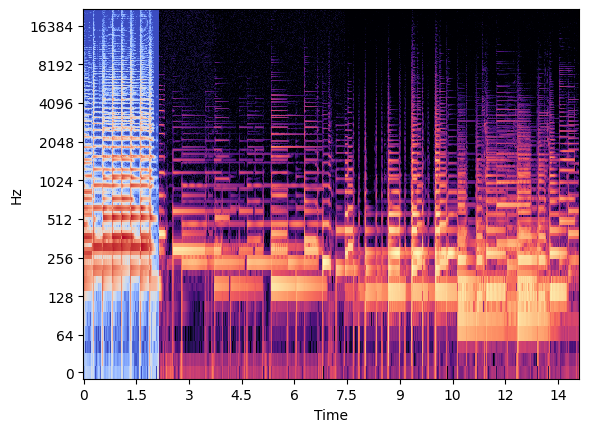

In [6]:
# 67 min - 126 imagens
save_spectogram(df_chords['Filename'], audio_fpath, output = 'spectogram/', count = 328)

In [18]:
def get_mel_spectrogram(file_path, max_padding=0, n_fft=2048, hop_length=512, n_mels=128):
    try:
        # Load audio file
        y, sr = librosa.load(file_path)

        # Normalize audio data between -1 and 1
        normalized_y = librosa.util.normalize(y)

        # Generate mel scaled filterbanks
        mel = librosa.feature.melspectrogram(y = normalized_y, sr=sr, n_mels=n_mels)

        # Convert sound intensity to log amplitude:
        mel_db = librosa.amplitude_to_db(abs(mel))

        # Normalize between -1 and 1
        normalized_mel = librosa.util.normalize(mel_db)

        # Should we require padding
        shape = normalized_mel.shape[1]
        if (max_padding > 0 & shape < max_padding):
            xDiff = max_padding - shape
            xLeft = xDiff//2
            xRight = xDiff-xLeft
            normalized_mel = np.pad(normalized_mel, pad_width=((0,0), (xLeft, xRight)), mode='constant')

    except Exception as e:
        print("Error parsing wavefile: ", e)
        return None 
    return normalized_mel

In [20]:
def get_label(filepath):

    metadata = pd.read_csv('metadata.csv', sep = ',')
    chords = {}

    filename = filepath.split('/')[1]
    chord = metadata[metadata['Filename'] == filename]['Acorde'].values[0]

    return chord

In [22]:
filepaths = audio_fpath + df_chords['Filename']

features = []
labels = []
n_mels = 40
frames_max = 0
for i in filepaths:
    mels = get_mel_spectrogram(i, 0, n_mels=n_mels)
    num_frames = mels.shape[1]
    features.append(mels)
    labels.append(get_label(i))

    if (num_frames > frames_max):
        frames_max = num_frames
    

In [30]:
filepaths

2         processed_audio/file_1395.wav
3         processed_audio/file_1396.wav
9         processed_audio/file_1402.wav
10        processed_audio/file_1403.wav
14        processed_audio/file_2487.wav
                     ...               
2153    processed_audio/file_180804.wav
2156    processed_audio/file_180807.wav
2157    processed_audio/file_180808.wav
2158    processed_audio/file_180809.wav
2159    processed_audio/file_180810.wav
Name: Filename, Length: 1128, dtype: object

In [25]:
# Given an numpy array of features, zero-pads each ocurrence to max_padding
def add_padding(features, max_padding=174):
    padded = []

    # Add padding
    for i in range(len(features)):
        px = features[i]
        size = len(px[0])
        # Add padding if required
        if (size < max_padding):
            xDiff = max_padding - size
            xLeft = xDiff//2
            xRight = xDiff-xLeft
            px = np.pad(px, pad_width=((0,0), (xLeft, xRight)), mode='constant')
        
        padded.append(px)

    return padded

In [26]:
padded_features = add_padding(features, frames_max)

In [27]:
X = np.array(padded_features)
y = np.array(labels)

In [34]:
X = np.load("X-mel_spec.npy")
y = np.load("y-mel_spec.npy")
X.shape

(1128, 40, 608)